# Analyse des grèves ouvrières (1900-1950)

Notre travail final présente l'analyse d'un sous corpus portant sur sur la representation des **greves ouvriere dans la presse belge** entre les années **1900 et 1950**. L'objectif est d'appliquer l'ensemble des connaissances acquises lors des travaux precedents

## Imports

In [21]:
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
from pathlib import Path 

data_dir = Path("../data/camille_greve_txt")

data_dir


WindowsPath('../data/camille_greve_txt')

Verification et comptage des fichiers

In [4]:
# On verifie si le dossier existe
print("Dossier trouvé:", data_dir.exists())

# On récupère tous les fichiers .txt
txt_files = sorted(list(data_dir.glob("*.txt")))

# On affiche le nombre de fichiers présent
print("Nombre de fichier TXT trouvé:", len(txt_files))

# On affiche quelques un
txt_files[:5]

Dossier trouvé: True
Nombre de fichier TXT trouvé: 957


[WindowsPath('../data/camille_greve_txt/KB_JB773_1919-02-01_01-00002.txt'),
 WindowsPath('../data/camille_greve_txt/KB_JB773_1919-03-01_01-00002.txt'),
 WindowsPath('../data/camille_greve_txt/KB_JB773_1919-04-01_01-00001.txt'),
 WindowsPath('../data/camille_greve_txt/KB_JB773_1919-04-01_01-00003.txt'),
 WindowsPath('../data/camille_greve_txt/KB_JB773_1919-05-01_01-00002.txt')]

Extraction de l'année dans les noms des fichiers

In [5]:
annees = []

pattern = re.compile(r"(18|19|20)\d{2}")

for f in txt_files:
    m = pattern.search(f.name)
    if m:
        year = int(m.group(0))

        if 1800 <= year <= 2100:
            annees.append(year)
        else:
            print("Pas d'année trouvée dans:", f.name)
        
len(annees), annees[:10]

(957, [1919, 1919, 1919, 1919, 1919, 1919, 1919, 1919, 1919, 1919])

Comptage du nombre de fichiers par an

In [6]:
compte_par_annee = Counter(annees)

for annee in sorted(compte_par_annee):
    print(annee, ":", compte_par_annee[annee])

1900 : 10
1901 : 19
1902 : 13
1903 : 9
1904 : 7
1905 : 13
1906 : 12
1907 : 14
1908 : 9
1909 : 12
1910 : 15
1911 : 12
1912 : 25
1913 : 17
1914 : 16
1919 : 28
1920 : 43
1921 : 32
1922 : 32
1923 : 30
1924 : 26
1925 : 23
1926 : 32
1927 : 14
1928 : 15
1929 : 13
1930 : 6
1931 : 10
1932 : 25
1933 : 34
1934 : 34
1935 : 23
1936 : 41
1937 : 40
1938 : 25
1939 : 20
1940 : 4
1941 : 6
1942 : 4
1943 : 4
1944 : 1
1945 : 11
1946 : 28
1947 : 45
1948 : 38
1949 : 29
1950 : 38


## Chargement des textes

Lecture des fichiers

In [7]:
def lire_texte(path):
    for enc in ("utf-8", "latin-1", "cp1252"):
        try:
            with open(path, "r", encoding=enc, errors="ignore") as f:
                return f.read()
        except Exception:
            continue
        print("Impossible de lire:", path)
        return ""


Construction de la liste de document

In [8]:
docs = []

print("Nombre de chemins txt:", len(txt_files))
print("Nombre d'années:", len(annees))

for path, year in zip(txt_files, annees):
    texte = lire_texte(path)
    docs.append({
        "fichier": path.name,
        "annee": year,
        "texte": texte
    })

print("Nombre de documents chargés:", len(docs))

Nombre de chemins txt: 957
Nombre d'années: 957
Nombre de documents chargés: 957


Apercu d'un document 

In [10]:
i=0
doc_exemple = docs[i]

print("Fichier:", doc_exemple["fichier"])
print("Année:", doc_exemple["annee"])
print("Longueur du texte:", len(doc_exemple["texte"]), "caractères")
print("\nExtrait : \n")
print(doc_exemple["texte"][:800])

Fichier: KB_JB773_1919-02-01_01-00002.txt
Année: 1919
Longueur du texte: 45240 caractères

Extrait : 

■ tamiitm Le ptoblème esta tan " à la Cbambro espagnol Le. leader eatelaniste Cambo a soulevé! *> ; la Chambre espagnole, un nouveau débat * eur la question de l'autonomie de la Catalogne. Il a adressé au comte Romanonès, pré- «ident du cabinet espagnol, une véritable mise en demeure. Dans -sa réponse, le premier ministre a dê- *iaré qu'il faut mettre un terme a des agitations qui empoisonnent l'Espagne, mais le •Parlement a seul qualité pour se prononcer sur la question catalane. Il a rappelé ses efforts personnels pour aboutir à une heu-. «t'Use solution dp problème et regretté que M. Cambo n'ait voulu prendre aucune part aux travaux de la commission nommée par lo gouvernement. Le cabinet reste partisan d'une solution de la question dans le sens ■■ des vues exprimées. par la Catalogne, m


## Nettoyage du corpus

 fonction de nettoyage

In [13]:
# On nettoie le texte en vue des analyses, on met tout en majuscules, 
# on remplace des sauts de ligne par des espaces,
# on supprime les chiffre et les signes de ponctuation
# on reduit les multiples espaces 

def nettoyer_texte(texte):

    # Minuscules
    t = texte.lower()

    # On remplace les retours à la ligne par des espaces
    t = t.replace("\n", " ")

    # On supprome tout ce qui n'est pas lettre ou espace
    t = re.sub(r"[^a-zàâäéèêëîïôöùûüçœæ\s-]", " ", t)

    # On remplace des tirets par des espaces
    t = t.replace("-", " ")

    # On reduit les espaces multiples
    t = re.sub(r"\s+", " ", t).strip()

    return t

Application du nettoyage à tout les documents du corpus

In [14]:
for d in docs:
    brut = d["texte"]
    d["texte_net"] = nettoyer_texte(brut)

nb_vides = sum(1 for d in docs if not d["texte_net"])
print("Documents vides après nettoyage:", nb_vides)
print("Documents avec texte nettoyé:", len(docs) - nb_vides)

Documents vides après nettoyage: 0
Documents avec texte nettoyé: 957


Apercu Avant/Après nettoyage

In [16]:
i=0
doc_exemple = docs[i]

print("Fichier:", doc_exemple["fichier"])
print("Année:", doc_exemple["annee"])
print("\n--- TEXTE BRUTE (extrait) ---\n")
print(doc_exemple["texte"][:500])
print("\n--- TEXTE NETTOYE (extrait) ---\n")
print(doc_exemple["texte_net"][:500])

Fichier: KB_JB773_1919-02-01_01-00002.txt
Année: 1919

--- TEXTE BRUTE (extrait) ---

■ tamiitm Le ptoblème esta tan " à la Cbambro espagnol Le. leader eatelaniste Cambo a soulevé! *> ; la Chambre espagnole, un nouveau débat * eur la question de l'autonomie de la Catalogne. Il a adressé au comte Romanonès, pré- «ident du cabinet espagnol, une véritable mise en demeure. Dans -sa réponse, le premier ministre a dê- *iaré qu'il faut mettre un terme a des agitations qui empoisonnent l'Espagne, mais le •Parlement a seul qualité pour se prononcer sur la question catalane. Il a rappelé s

--- TEXTE NETTOYE (extrait) ---

tamiitm le ptoblème esta tan à la cbambro espagnol le leader eatelaniste cambo a soulevé la chambre espagnole un nouveau débat eur la question de l autonomie de la catalogne il a adressé au comte romanonès pré ident du cabinet espagnol une véritable mise en demeure dans sa réponse le premier ministre a dê iaré qu il faut mettre un terme a des agitations qui empoisonnent l espa

 ## Exploration Lexicale

In [22]:
# Liste manuelle de stopwords français (inspirée de NLTK + mots peu informatifs du corpus)
sw = [
    # articles / pronoms / auxiliaires fréquents
    "le", "la", "les", "un", "une", "des",
    "de", "du", "au", "aux", "et", "en", "dans", "par", "pour", "sur",
    "ce", "cet", "cette", "ces",
    "qui", "que", "quoi", "dont", "où",
    "ne", "pas", "ni",
    "je", "tu", "il", "elle", "on", "nous", "vous", "ils", "elles",
    "me", "te", "se", "moi", "toi", "lui", "leur", "leurs",
    "mon", "ma", "mes", "ton", "ta", "tes",
    "son", "sa", "ses", "notre", "nos", "votre", "vos",
    "y", "là", "ici",
    
    # formes verbales / auxiliaires fréquents
    "être", "avoir", "fait", "faire", "avait", "étaient", "était", "sont", "sera", "seront",
    "avoir", "avait", "avaient", "ai", "as", "a", "avons", "avez", "ont",
    
    # adverbes / mots peu informatifs
    "plus", "très", "bien", "sans", "avec", "comme", "aussi",
    "tous", "toutes", "tout", "toute",
    "déjà", "encore", "toujours", "souvent",
    "ainsi", "donc", "cependant", "pourtant",
    "après", "avant", "pendant", "depuis",
    "moins", "peut", "aucun", "aucune",
    "non", "oui",

    # mots de structure / bruit
    "qu", "c", "d", "l", "m", "n", "s", "t",

    # mots spécifiques au corpus / peu pertinents pour les thèmes
    "grève", "grèves",      # mot de requête → trop fréquent
    "rossel", "dem", "van", "het"
]

# On transforme en set pour accélérer les recherches
sw = set(sw)
len(sw)

121

Construction de la liste de tokens sur le corpus

In [24]:
# On concatene tous les textes nettoyés en une seule grande chaîne
corpus_net = " ".join(d["texte_net"] for d in docs)

tokens = [w for w in corpus_net.split() if w not in sw and len(w) > 2]

print("Nombre total de tokens (après stopwords):", len(tokens))

freq = Counter(tokens)
freq.most_common(30)

Nombre total de tokens (après stopwords): 3306999


[('est', 48016),
 ('été', 18700),
 ('mais', 11975),
 ('deux', 9135),
 ('même', 7060),
 ('rue', 6853),
 ('gouvernement', 6840),
 ('contre', 6663),
 ('bruxelles', 6527),
 ('sous', 5818),
 ('ministre', 5640),
 ('ans', 5483),
 ('heures', 5450),
 ('fut', 5433),
 ('entre', 5317),
 ('prix', 5200),
 ('pays', 5117),
 ('paris', 5017),
 ('guerre', 4974),
 ('dit', 4926),
 ('président', 4850),
 ('grand', 4795),
 ('général', 4768),
 ('belgique', 4442),
 ('conseil', 4419),
 ('lieu', 4401),
 ('autre', 4265),
 ('autres', 4261),
 ('cours', 4239),
 ('francs', 4204)]

Nuage de mots global

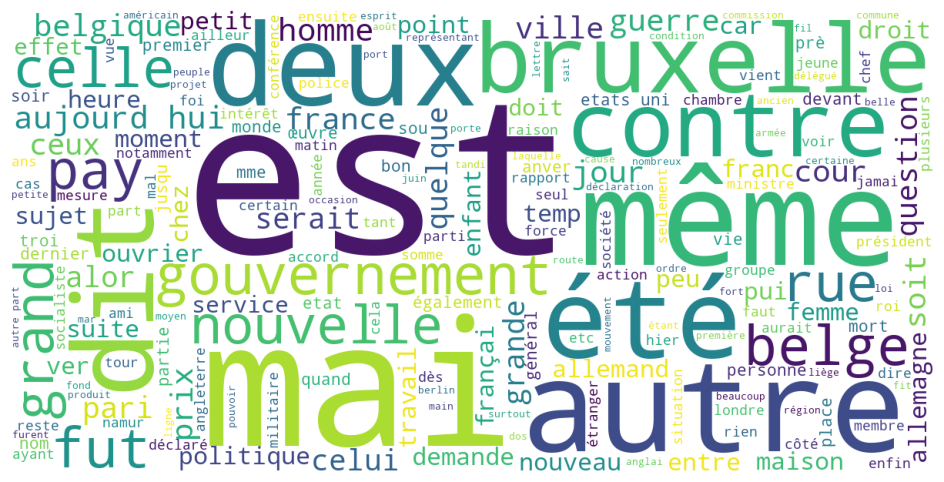

In [25]:
texte_pour_wc = " ".join(tokens)

wc = WordCloud(
    width = 1200,
    height = 600,
    background_color = "white"
).generate(texte_pour_wc)

plt.figure(figsize=(12, 6))
plt.imshow(wc)
plt.axis("off")
plt.show()

amelioration des stopwords

In [26]:
sw.update([
    "est", "été", "mais", "même", "entre",
    "autre", "autres", "sous", "dit", "fut",
    "grand", "prix", "ans", "heures", "cours",
    "lieu"
])

len(sw)

137

Nouvelle liste de tokens

In [27]:
tokens = [w for w in corpus_net.split() if w not in sw and len(w) > 2]

print("Tokens après amélioration :", len(tokens))
print("\nTop 30 recalculé :")
freq = Counter(tokens)
freq.most_common(30)

Tokens après amélioration : 3161660

Top 30 recalculé :


[('deux', 9135),
 ('rue', 6853),
 ('gouvernement', 6840),
 ('contre', 6663),
 ('bruxelles', 6527),
 ('ministre', 5640),
 ('pays', 5117),
 ('paris', 5017),
 ('guerre', 4974),
 ('président', 4850),
 ('général', 4768),
 ('belgique', 4442),
 ('conseil', 4419),
 ('francs', 4204),
 ('trois', 4081),
 ('temps', 4052),
 ('soir', 4050),
 ('grande', 4020),
 ('jour', 4005),
 ('france', 3913),
 ('quelques', 3862),
 ('vers', 3855),
 ('peu', 3816),
 ('matin', 3804),
 ('londres', 3646),
 ('belge', 3638),
 ('part', 3574),
 ('travail', 3571),
 ('mois', 3561),
 ('saint', 3528)]

Nuage de mots mis à jour

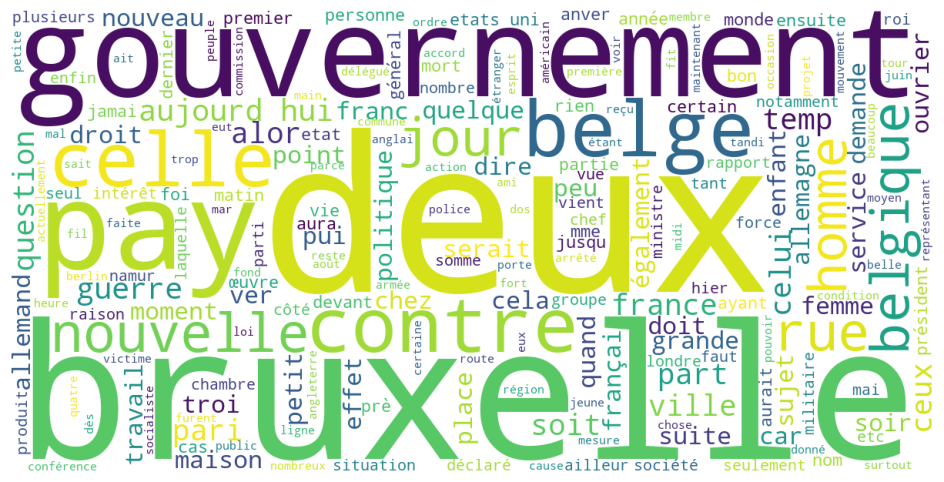

In [28]:
texte_pour_wc = " ".join(tokens)

wc = WordCloud(
    width=1200,
    height=600,
    background_color="white"
).generate(texte_pour_wc)

plt.figure(figsize=(12, 6))
plt.imshow(wc)
plt.axis("off")
plt.show()